In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import _pickle as pickle

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [0]:
#Load data
with open('/content/drive/My Drive/ML_Data/sms-NLP/sms_train_test.dat', 'rb') as fp:
    X_train_dtm = pickle.load(fp)
    X_test_dtm = pickle.load(fp)
    X_train_tfidf = pickle.load(fp)
    X_test_tfidf = pickle.load(fp)
    X_train = pickle.load(fp)
    X_test = pickle.load(fp) 
    y_train = pickle.load(fp)
    y_test = pickle.load(fp)

In [7]:
print("X_train_dtm.shape: ", X_train_dtm.shape)
print("X_test_dtm.shape: ", X_test_dtm.shape)
print("X_train_tfidf.shape: ", X_train_tfidf.shape)
print("X_test_tfidf.shape: ", X_test_tfidf.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

print("\nX_train_dtm.type: ", type(X_train_dtm))

X_train_dtm.shape:  (4457, 7668)
X_test_dtm.shape:  (1115, 7668)
X_train_tfidf.shape:  (4457, 7668)
X_test_tfidf.shape:  (1115, 7668)
y_train.shape:  (4457,)
y_test.shape:  (1115,)

X_train_dtm.type:  <class 'scipy.sparse.csr.csr_matrix'>


In [0]:
scores =  []
mean_scores = []

## Machine Learning Classification methods implementation 

### 1. Logistic Regression 

In [0]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr_clf = LogisticRegression(solver = "lbfgs", random_state = 42)

lr_scores = cross_val_score(lr_clf, X_train_dtm, y_train, cv = 10)
print("log_scores: ", lr_scores)
print("Mean score: ", lr_scores.mean())
print("Std deviation: ", lr_scores.std())

lr_ms = "{0:.4f}".format(lr_scores.mean()) + " +/- " + "{0:.4f}".format(lr_scores.std())
mean_scores.append(lr_ms)

log_scores:  [0.97757848 0.98206278 0.97982063 0.98654709 0.99327354 0.97757848
 0.98206278 0.97757848 0.97752809 0.98423423]
Mean score:  0.9818264566274342
Std deviation:  0.004856588753484543


In [11]:
lr_clf.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
lr_score = lr_clf.score(X_test_dtm, y_test)
print(lr_score)
scores.append(lr_score)

lr_y_pred = lr_clf.predict(X_test_dtm)
print(lr_y_pred[:10])

0.9811659192825112
[0 0 0 1 0 0 0 0 0 0]


In [13]:
lr_confMatrix = confusion_matrix(y_true=y_test, y_pred=lr_y_pred)
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=lr_y_pred).ravel()
print(tn, fp, fn, tp)

print(lr_confMatrix)

966 0 21 128
[[966   0]
 [ 21 128]]


In [14]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=lr_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=lr_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=lr_y_pred))

Precision: 1.000
Recall: 0.859
F1: 0.924


### 2.1 Support Vector Machines - SVM linear

In [0]:
from sklearn.svm import SVC

In [0]:
#Best estimator from 02_hyp_param_svm
svm_lr_clf = SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
svm_lr_scores = cross_val_score(svm_lr_clf, X_train_dtm, y_train, cv = 10)
print("svm_lr_scores: ", svm_lr_scores)
print("Mean score: ", svm_lr_scores.mean())
print("Std deviation: ", svm_lr_scores.std())

svm_lr_ms = "{0:.4f}".format(svm_lr_scores.mean()) + " +/- " + "{0:.4f}".format(svm_lr_scores.std())
mean_scores.append(svm_lr_ms)
print(mean_scores)

svm_lr_scores:  [0.98206278 0.98654709 0.98206278 0.98654709 0.99327354 0.98206278
 0.98654709 0.97982063 0.98202247 0.98873874]
Mean score:  0.9849684977464994
Std deviation:  0.003888103877191339
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039']


In [18]:
svm_lr_clf.fit(X_train_dtm, y_train)
svm_lr_score = svm_lr_clf.score(X_test_dtm, y_test)
scores.append(svm_lr_score)                                          
svm_lr_score

0.9829596412556054

In [19]:
svm_lr_y_pred = svm_lr_clf.predict(X_test_dtm) 
svm_lr_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [20]:
svm_lr_clf_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_lr_y_pred)
svm_lr_clf_confMatrix

array([[966,   0],
       [ 19, 130]])

In [21]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_lr_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_lr_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_lr_y_pred))

Precision: 1.000
Recall: 0.872
F1: 0.932


### 2.2 Support Vector Machines - SVC Kernal(rbf)

In [0]:
#Best estimator from 02_hyp_param_svm
svm_rbf_clf = SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
svm_rbf_scores = cross_val_score(svm_rbf_clf, X_train_dtm, y_train, cv = 10)

print("svm_rbf_scores: ", svm_rbf_scores)
print("Mean score: ", svm_rbf_scores.mean())
print("Std deviation: ", svm_rbf_scores.std())

svm_rbf_ms = "{0:.4f}".format(svm_rbf_scores.mean()) + " +/- " + "{0:.4f}".format(svm_rbf_scores.std())
mean_scores.append(svm_rbf_ms)
print(mean_scores)

svm_rbf_scores:  [0.97085202 0.96412556 0.96860987 0.96188341 0.96860987 0.96860987
 0.95964126 0.95515695 0.95280899 0.96621622]
Mean score:  0.963651399421793
Std deviation:  0.005842360421115627
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039', '0.9637 +/- 0.0058']


In [24]:
svm_rbf_clf.fit(X_train_dtm, y_train)

svm_rbf_score = svm_rbf_clf.score(X_test_dtm, y_test)
scores.append(svm_rbf_score)                                          
svm_rbf_score

0.9659192825112107

In [25]:
svm_rbf_y_pred = svm_rbf_clf.predict(X_test_dtm)
svm_rbf_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [26]:
svm_rbf_confMatrix = confusion_matrix(y_true = y_test, y_pred = svm_rbf_y_pred)
svm_rbf_confMatrix

array([[966,   0],
       [ 38, 111]])

In [27]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_rbf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_rbf_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_rbf_y_pred))

Precision: 1.000
Recall: 0.745
F1: 0.854


### Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
#Best model from 03_hyp_param_dec_tree
tree_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=44,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [30]:
tree_clf_scores = cross_val_score(tree_clf, X_train_dtm, y_train, cv = 10)

print("tree_clf_scores: ", tree_clf_scores)
print("Mean score: ", tree_clf_scores.mean())
print("Std deviation: ", tree_clf_scores.std())

tree_clf_ms = "{0:.4f}".format(tree_clf_scores.mean()) + " +/- " + "{0:.4f}".format(tree_clf_scores.std())
mean_scores.append(tree_clf_ms)
print(mean_scores)

tree_clf_scores:  [0.97982063 0.97533632 0.98206278 0.96412556 0.96860987 0.96636771
 0.96636771 0.9529148  0.95955056 0.97072072]
Mean score:  0.9685876663684393
Std deviation:  0.008455339882173285
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039', '0.9637 +/- 0.0058', '0.9686 +/- 0.0085']


In [31]:
tree_clf.fit(X_train_dtm, y_train)

tree_clf_score = tree_clf.score(X_test_dtm, y_test)
scores.append(tree_clf_score)
tree_clf_score

0.968609865470852

In [32]:
tree_clf_y_pred = tree_clf.predict(X_test_dtm)
tree_clf_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [33]:
tree_clf_confMatrix = confusion_matrix(y_true = y_test, y_pred = tree_clf_y_pred)
tree_clf_confMatrix

array([[950,  16],
       [ 19, 130]])

In [34]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=tree_clf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=tree_clf_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=tree_clf_y_pred))

Precision: 0.890
Recall: 0.872
F1: 0.881


### 4. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
#Best estimator from 04_hyp_param_random_forest
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=44, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
rf_clf_scores = cross_val_score(rf_clf, X_train_dtm, y_train, cv = 10)

print("rf_clf_scores: ", rf_clf_scores)
print("Mean: ", rf_clf_scores.mean())
print("Standard Deviation: ", rf_clf_scores.std())

rf_clf_ms = "{0:.4f}".format(rf_clf_scores.mean()) + " +/- " + "{0:.4f}".format(rf_clf_scores.std())
mean_scores.append(rf_clf_ms)
print(mean_scores)

rf_clf_scores:  [0.97309417 0.96860987 0.96412556 0.97085202 0.97757848 0.96636771
 0.97533632 0.96412556 0.9752809  0.96621622]
Mean:  0.9701586801191275
Standard Deviation:  0.004714940454769304
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039', '0.9637 +/- 0.0058', '0.9686 +/- 0.0085', '0.9702 +/- 0.0047']


In [38]:
rf_clf.fit(X_train_dtm, y_train)

rf_clf_score = rf_clf.score(X_test_dtm, y_test)
scores.append(rf_clf_score)
rf_clf_score

0.968609865470852

In [39]:
rf_clf_y_pred = rf_clf.predict(X_test_dtm)
rf_clf_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [40]:
rf_clf_confMatrix = confusion_matrix(y_true = y_test, y_pred = rf_clf_y_pred)
rf_clf_confMatrix

array([[964,   2],
       [ 33, 116]])

In [41]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=tree_clf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=tree_clf_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=tree_clf_y_pred))

Precision: 0.890
Recall: 0.872
F1: 0.881


### Adaboost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
#Best estimator obtained from 05_hyp_param_adaboost
ada_clf = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=32,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.9999999999999999, n_estimators=21,
                   random_state=42)

In [44]:
ada_clf_scores = cross_val_score(ada_clf, X_train_dtm, y_train, cv = 10)

print("ada_clf_scores: ", ada_clf_scores)
print("Mean: ", ada_clf_scores.mean())
print("Standard Deviation: ", ada_clf_scores.std())

ada_clf_ms = "{0:.4f}".format(ada_clf_scores.mean()) + " +/- " + "{0:.4f}".format(ada_clf_scores.std())
mean_scores.append(ada_clf_ms)
print(mean_scores)

ada_clf_scores:  [0.97757848 0.97982063 0.97982063 0.98206278 0.98654709 0.97982063
 0.98430493 0.96188341 0.97078652 0.98648649]
Mean:  0.9789111568362839
Standard Deviation:  0.0071758624927747055
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039', '0.9637 +/- 0.0058', '0.9686 +/- 0.0085', '0.9702 +/- 0.0047', '0.9789 +/- 0.0072']


In [45]:
ada_clf.fit(X_train_dtm, y_train)

ada_clf_score = ada_clf.score(X_test_dtm, y_test)
scores.append(ada_clf_score)
ada_clf_score

0.9820627802690582

In [46]:
ada_clf_y_pred = ada_clf.predict(X_test_dtm)
ada_clf_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [47]:
ada_clf_confMatrix = confusion_matrix(y_true = y_test, y_pred = ada_clf_y_pred)
ada_clf_confMatrix

array([[963,   3],
       [ 17, 132]])

In [48]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=ada_clf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=ada_clf_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=ada_clf_y_pred))

Precision: 0.978
Recall: 0.886
F1: 0.930


### Gradientboost Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# Best estimator obtained from 06_hyp_param_grdboost
grb_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=178,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
grb_clf_scores = cross_val_score(grb_clf, X_train_dtm, y_train, cv = 10)

print("grb_clf_scores: ", grb_clf_scores)
print("Mean: ", grb_clf_scores.mean())
print("Standard Deviation: ", grb_clf_scores.std())

grb_clf_ms = "{0:.4f}".format(grb_clf_scores.mean()) + " +/- " + "{0:.4f}".format(grb_clf_scores.std())
mean_scores.append(grb_clf_ms)
print(mean_scores)

grb_clf_scores:  [0.98654709 0.98654709 0.98878924 0.97982063 0.98654709 0.97757848
 0.97757848 0.96636771 0.97303371 0.98198198]
Mean:  0.9804791474600514
Standard Deviation:  0.00673501533044217
['0.9818 +/- 0.0049', '0.9850 +/- 0.0039', '0.9637 +/- 0.0058', '0.9686 +/- 0.0085', '0.9702 +/- 0.0047', '0.9789 +/- 0.0072', '0.9805 +/- 0.0067']


In [53]:
grb_clf.fit(X_train_dtm, y_train)

grb_clf_score = grb_clf.score(X_test_dtm, y_test)
scores.append(grb_clf_score)
grb_clf_score

0.9757847533632287

In [54]:
grb_clf_y_pred = grb_clf.predict(X_test_dtm)
grb_clf_y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [55]:
grb_clf_confMatrix = confusion_matrix(y_true = y_test, y_pred = grb_clf_y_pred)
grb_clf_confMatrix

array([[964,   2],
       [ 25, 124]])

In [57]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=grb_clf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=grb_clf_y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=grb_clf_y_pred))

Precision: 0.984
Recall: 0.832
F1: 0.902


In [58]:
x_plots = range(7)
x_labels = ['Logistic Regression', 'SVM Linear', 'SVM rbf', 
            'Decision Tree', 'Random Forest', 'Adaboost', 'Gradient Boosting']
y_plots = scores
print(y_plots)

[0.9811659192825112, 0.9829596412556054, 0.9659192825112107, 0.968609865470852, 0.968609865470852, 0.9820627802690582, 0.9757847533632287]


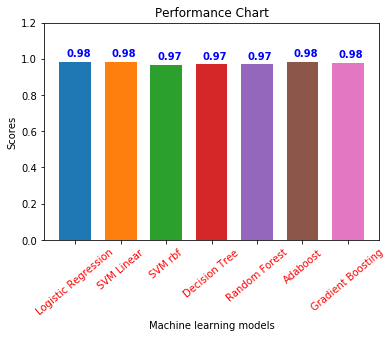

In [59]:
plt.xticks(x_plots, x_labels, color = 'red', rotation = 40)
for i in range(7):
    plt.text(x= x_plots[i]-0.2, y= y_plots[i]+0.03, s = "%.2f" %(y_plots[i]), color='blue', fontweight='bold')
    plt.bar(x_plots[i], y_plots[i], width=0.7)
plt.ylim([0,1.2])
plt.title("Performance Chart")
plt.xlabel("Machine learning models")
plt.ylabel("Scores")
plt.show()

In [65]:
mean_values = np.array(mean_scores).reshape(1,-1)
mean_values.shape

(1, 7)

In [0]:
mean_scores_pd = pd.DataFrame(data=mean_values, columns=x_labels)

In [72]:
mean_scores_pd.index.name = 'Mean_score'

mean_scores_pd

,Logistic Regression,SVM Linear,SVM rbf,Decision Tree,Random Forest,Adaboost,Gradient Boosting
Mean_score,,,,,,,
0,0.9818 +/- 0.0049,0.9850 +/- 0.0039,0.9637 +/- 0.0058,0.9686 +/- 0.0085,0.9702 +/- 0.0047,0.9789 +/- 0.0072,0.9805 +/- 0.0067
